In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=GBP"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=GBP"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=7))


# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=7))



# Compute current value of my crpto

btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value

eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

btc_GBP_value = data_btc["data"]["1"]["quotes"]["GBP"]["price"]
my_btc_value_GBP = my_btc * btc_GBP_value

eth_GBP_value = data_eth["data"]["1027"]["quotes"]["GBP"]["price"]
my_eth_value_GBP = my_eth * eth_GBP_value



# Print current crypto wallet balance
print('\n')
print("My crypto balances in USD and GBP")
print(f'----------------------------'+'\n')
print(f"The current value of Aidan's {my_btc} BTC is US${my_btc_value:0.2f}")
print(f"The current value of Aidan's {my_eth} ETH is US${my_eth_value:0.2f}")
print('\n')
print(f"The current value of Aidan's {my_btc} BTC in Sterling is £{my_btc_value_GBP:0.2f}")
print(f"The current value of Aidan's {my_eth} ETH is Sterling is £{my_eth_value_GBP:0.2f}")

{
       "data": {
              "1": {
                     "id": 1,
                     "name": "Bitcoin",
                     "symbol": "BTC",
                     "website_slug": "bitcoin",
                     "rank": 1,
                     "circulating_supply": 18900412,
                     "total_supply": 18900412,
                     "max_supply": 21000000,
                     "quotes": {
                            "USD": {
                                   "price": 46982.0,
                                   "volume_24h": 30473259632,
                                   "market_cap": 889157086028,
                                   "percentage_change_1h": -0.437844582390987,
                                   "percentage_change_24h": -4.23307746087207,
                                   "percentage_change_7d": -6.89598983441576,
                                   "percent_change_1h": -0.437844582390987,
                                   "percent_change_24h": -4.2330774

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [17]:
# Format current date as ISO format

today = pd.Timestamp("2021-12-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_prices = api.get_barset(
    tickers,
    timeframe,
    limit=1000
).df.tail()

# Preview DataFrame
df_prices.head()


AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2021-12-07 00:00:00-05:00  114.52  114.710  114.45  114.475  5783341.0   
2021-12-08 00:00:00-05:00  114.37  114.370  114.05  114.170  7416826.0   
2021-12-09 00:00:00-05:00  114.28  114.386  114.12  114.200  8223995.0   
2021-12-10 00:00:00-05:00  114.37  114.510  114.22  114.240  6263328.0   
2021-12-13 00:00:00-05:00  114.51  114.705  114.46  114.600  4006984.0   

                              SPY                                          
                             open      high       low   close      volume  
time                                                                       
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24  79124909.0  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54  62917411.0  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34  54963509.0  
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72  64958435.0  
2021-12-13 00:00:00-05:00  470.19  470.5600  466.2700  466.61  53533452.0

In [18]:
# Pick AGG and SPY close prices
agg_close_price = df_prices['AGG']['close'][0]
spy_close_price = df_prices['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.475
Current SPY closing price: $468.24


In [19]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23412.00
The current value of your 200 AGG shares is $22895.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = [ total_crypto, total_shares]

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['Crypto','Shares'], columns=['Amount in USD'])

# Display savings DataFrame
display(df_savings)

,Amount in USD
Crypto,76383.78
Shares,46307.00


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount in USD'>

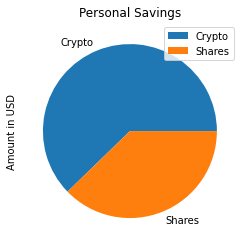

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount in USD',title='Personal Savings')

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal, keep saving!")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df.tail()

df_stock_data = pd.concat([df_stock_data])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.64  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.48  45962655.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.35  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.98  70595229.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.30  73129109.0

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-04-26 00:00:00-04:00          NaN  417.44  418.22  416.8111  417.64   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.48   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.35   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.98   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.30   

                                                    
                               volume daily_return  
time                                                
2021-04-26 00:00:00-04:00  44689009.0          NaN  
2021-04-27 00:00:00-04:00  45962655.0    -0.000383  
2021-04-28 00:00:00-04:00  45533863.0    -0.000311  
2021-04-29 00:00:00-04:00  70595229.0     0.006302  
2021-04-30 00:00:00-04:00  73129109.0    -0.006381

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ajmlaird/monu-virt-fin-11-2021-u-c/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


In [ ]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
MC_stocks_5.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC_stocks_5.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
summary_5

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5[8]*initial_investment, 2)
ci_upper_five = round(summary_5[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
MC_stocks_10.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC_stocks_10.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_stocks_10.summarize_cumulative_return()

# Print summary statistics
summary_10

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8]*initial_investment, 2)
ci_upper_ten = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

### One year retirement option

In [ ]:
MC_stocks_one = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*1
)



In [ ]:
MC_stocks_one.calc_cumulative_return()

In [ ]:
MC_stocks_one.plot_simulation()

In [ ]:
summary_one = MC_stocks_10.summarize_cumulative_return()
summary_one

In [ ]:
initial_investment = 60000
ci_lower_one = round(summary[8]*initial_investment, 2)
ci_upper_one = round(summary[9]*initial_investment, 2)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")